## Linear Regression in plain Python

In linear regression we want to model the relationship between a **scalar dependent variable** $y$ and one or more **independent (predictor) variables** $\boldsymbol{x}$.

**Given:** 
- dataset $\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(m)}, y^{(m)})\}$
- with $\boldsymbol{x}^{(i)}$ being a $d-$dimensional vector $\boldsymbol{x}^i = (x^{(i)}_1, ..., x^{(i)}_d)$
- $y^{(i)}$ being a scalar target variable

The linear regression model can be interpreted as a very **simple neural network:**
- it has a real-valued weight vector $\boldsymbol{w}= (w^{(1)}, ..., w^{(d)})$
- it has a real-valued bias $b$
- it uses the identity function as its activation function

A linear regression model can be trained using either  
a) gradient descent or  
b) the normal equation (closed-form solution): $\boldsymbol{w} = (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{y}$ 

where $\boldsymbol{X}$ is a matrix of shape $(m, n_{features})$ that holds all training examples.  
The normal equation requires computing the inverse of $\boldsymbol{X}^T \boldsymbol{X}$. The computational complexity of this operation lies between $O(n_{features}^{2.4}$) and $O(n_{features}^3$) (depending on the implementation).
Therefore, if the number of features in the training set is large, the normal equation will get very slow. 

* * *
Training a linear regression model has different steps.

**Step 0: ** 

Initialize the weight vector and bias with zeros (or small random values)

**OR**

Compute the parameters directly using the normal equation
* * *

**Step 1: ** (Only needed when training with gradient descent)

Compute a linear combination of the input features and weights. This can be done in one step for all training examples, using vectorization and broadcasting:
$\boldsymbol{\hat{y}} = \boldsymbol{X} \cdot \boldsymbol{w} + b $

where $\boldsymbol{X}$ is a matrix of shape $(m, n_{features})$ that holds all training examples, and $\cdot$ denotes the dot product.
* * *

**Step 2: ** (Only needed when training with gradient descent)

Compute the cost (mean squared error) over the training set:

$J(\boldsymbol{w},b) = \frac{1}{m} \sum_{i=1}^m \Big(\hat{y}^{(i)} - y^{(i)} \Big)^2$
* * *

**Step 3: **  (Only needed when training with gradient descent)

Compute the partial derivatives of the cost function with respect to each parameter:

$ \frac{\partial J}{\partial w_j} = \frac{2}{m}\sum_{i=1}^m \Big( \hat{y}^{(i)} - y^{(i)} \Big) x^{(i)}_j$

$ \frac{\partial J}{\partial b} = \frac{2}{m}\sum_{i=1}^m \Big( \hat{y}^{(i)} - y^{(i)} \Big)$


The gradient containing all partial derivatives can then be computed as follows: 

$\nabla_{\boldsymbol{w}} J = \frac{2}{m} \boldsymbol{X}^T \cdot \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)$

$\nabla_{\boldsymbol{b}} J = \frac{2}{m} \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)$
* * *

**Step 4: ** (Only needed when training with gradient descent)

Update the weight vector and bias:

$\boldsymbol{w} = \boldsymbol{w} - \eta \, \nabla_w J$  

$b = b - \eta \, \nabla_b J$  


where $\eta$ is the learning rate.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(123)

## Dataset

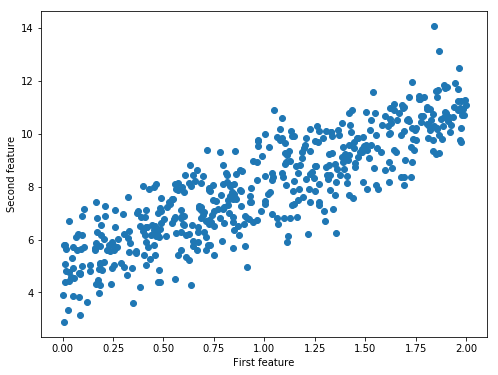

In [6]:
# We will use a simple training set

X = 2 * np.random.rand(500, 1)
y = 5 + 3 * X + np.random.randn(500, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [7]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

print('Shape X_train: ', X_train.shape)
print('Shape y_train: ', y_train.shape)
print('Shape X_test: ', X_test.shape)
print('Shape y_test: ', y_test.shape)

Shape X_train:  (375, 1)
Shape y_train:  (375, 1)
Shape X_test:  (125, 1)
Shape y_test:  (125, 1)


## Initialize and set up model

In [8]:
n_samples, n_features = X_train.shape
n_samples_test, _ = X_test.shape

# Step 0: Initialize the parameters
w = np.zeros(shape=(n_features,1))
b = 0

In [10]:
def train_gradient_descent(X, y, w, b, learning_rate=0.01, n_iters=100):
    """
    Trains a linear regression model using gradient descent
    """
    n_samples, n_features = X.shape
    costs = []
    
    for i in range(n_iters):
        # Step 1: Compute a linear combination of the input features and weights
        y_predict = np.dot(X, w) + b

        # Step 2: Compute cost over training set
        cost = 1/n_samples * np.sum((y_predict - y)**2)
        costs.append(cost)

        if i % 100 == 0:
            print(f"Cost at iteration {i}: {cost}")
            
        # Step 3: Compute the gradients
        dJ_dw = 2/n_samples * np.dot(X.T, (y_predict - y))
        dJ_db = 2/n_samples * np.sum((y_predict - y))  # Step 4: Update the parameters
        w = w - learning_rate * dJ_dw
        b = b - learning_rate * dJ_db

    return w, b, costs

def train_normal_equation(X, y):
    """
    Trains a linear regression model using the normal equation
    """
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return w

def predict(X, w, b):
    return np.dot(X, w) + b

## Training and testing with gradient descent

Cost at iteration 0: 66.45256981003433
Cost at iteration 100: 2.2084346146095934
Cost at iteration 200: 1.2797812854182806
Cost at iteration 300: 1.2042189195356685
Cost at iteration 400: 1.1564867816573
Cost at iteration 500: 1.121391041394467

Error on training set: 1.0955106876851959
Error on test set: 1.1378637911373353


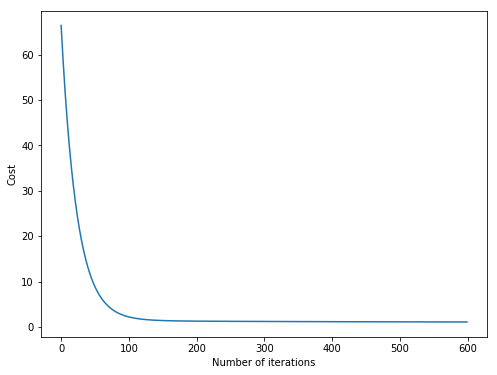

In [11]:
n_iters = 600
learning_rate = 0.005
w_trained, b_trained, costs = train_gradient_descent(X_train, y_train, w, b, learning_rate, n_iters)

y_p_train = predict(X_train, w_trained, b_trained)
y_p_test = predict(X_test, w_trained, b_trained)

error_train =  1/n_samples * np.sum((y_p_train - y_train)**2)
error_test =  1/n_samples_test * np.sum((y_p_test - y_test)**2)
print()
print(f"Error on training set: {error_train}")
print(f"Error on test set: {error_test}")

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(n_iters), costs)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

## Training with Normal Equation

In [12]:
# To compute the parameters using the normal equation, we add a bias value of 1 to each input example
X_b_train = np.c_[np.ones((n_samples)), X_train]
X_b_test = np.c_[np.ones((n_samples_test)), X_test]

w_trained = train_normal_equation(X_b_train, y_train)

y_p_train = predict(X_b_train, w_trained, 0)
y_p_test = predict(X_b_test, w_trained, 0)

error_train =  1/n_samples * np.sum((y_p_train - y_train)**2)
error_test =  1/n_samples_test * np.sum((y_p_test - y_test)**2)
print()
print(f"Error on training set: {error_train}")
print(f"Error on test set: {error_test}")


Error on training set: 1.0228140491805373
Error on test set: 1.0432342117601148


## Visualize test predictions

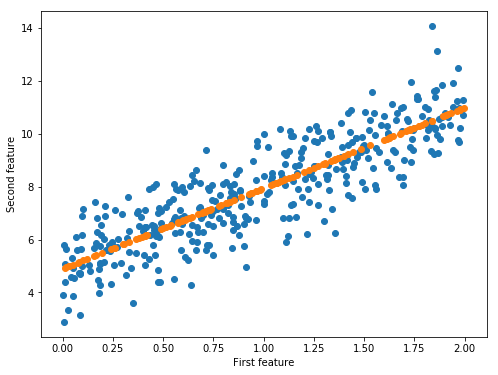

In [13]:
# Plot the test predictions

fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_p_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()